In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


data_df = pd.read_csv('yX.csv')

# Extract y and X from the DataFrame
y = data_df['target'].values
X = data_df.drop('target', axis=1).values
n_features = X.shape[1]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standard linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)



In [10]:
mse_lr

109.45655376603179

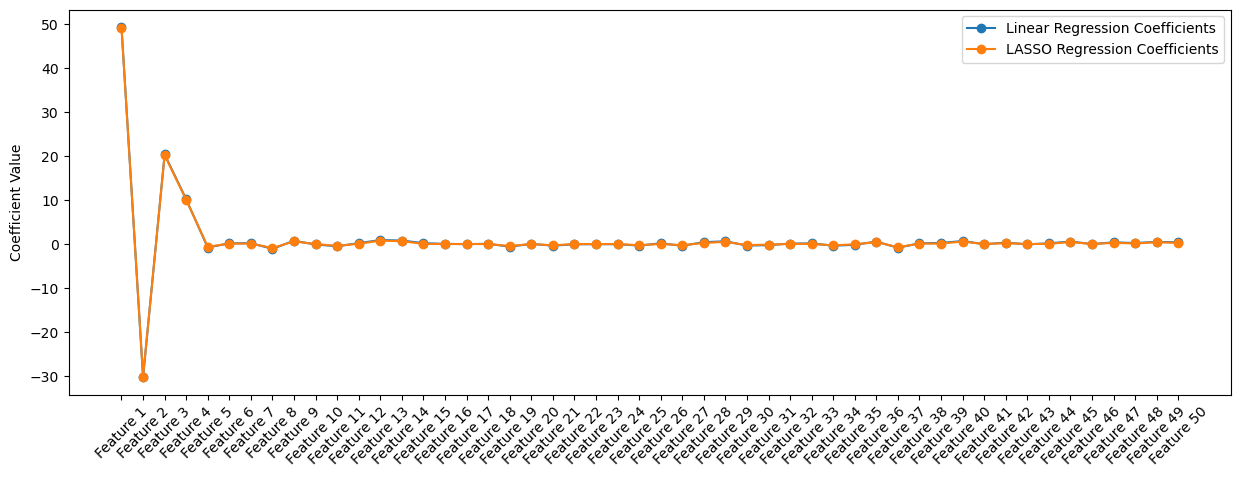

Mean Squared Error of Linear Regression: 109.45655376603179
Mean Squared Error of LASSO Regression: 106.85781540107695


In [27]:
# Lasso regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# Compare coefficients
plt.figure(figsize=(15, 5))
plt.plot(lr.coef_, label='Linear Regression Coefficients', marker='o')
plt.plot(lasso.coef_, label='LASSO Regression Coefficients', marker='o')
plt.xticks(range(n_features), ['Feature '+str(i) for i in range(1, n_features+1)], rotation=45)
plt.ylabel('Coefficient Value')
plt.legend()
plt.show()

# Print MSE of both models
print(f"Mean Squared Error of Linear Regression: {mse_lr}")
print(f"Mean Squared Error of LASSO Regression: {mse_lasso}")


In [16]:
# Define a range of alphas
alphas = np.linspace(0.0001, 1, num=100)

# Initialize LassoCV
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=0)

# Fit the model
lasso_cv.fit(X_train, y_train)

# Best alpha
best_alpha = lasso_cv.alpha_
#best_mse = lasso_cv



In [5]:
best_alpha

0.36369999999999997

In [19]:
lasso_cv.mse_path_[1,0:5]

array([ 95.52618599, 110.21807842, 125.3718045 ,  93.4915709 ,
        92.3271438 ])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


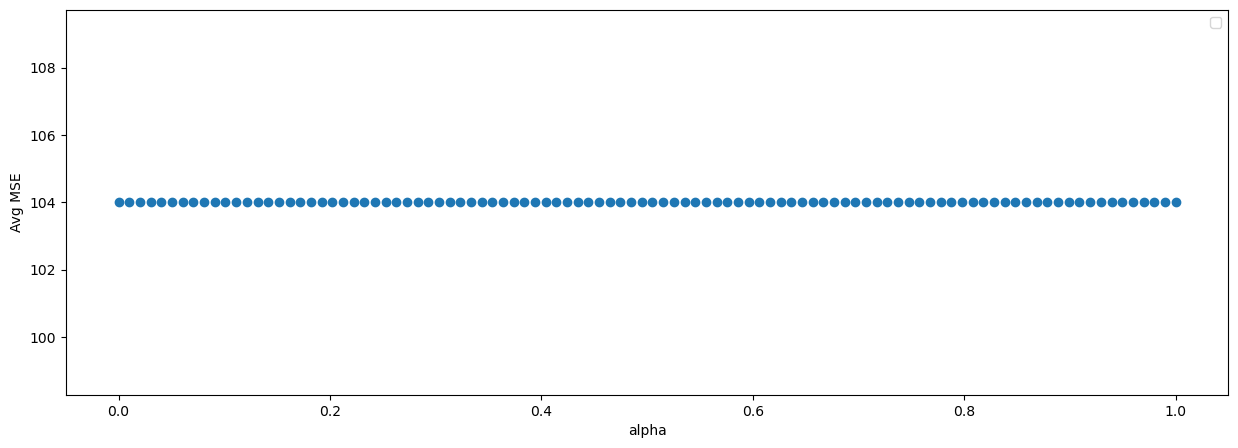

In [14]:
mean_mse_across_folds = np.mean(lasso_cv.mse_path_, axis=1)

df = pd.DataFrame({
    'alpha': alphas,
    'mse': mse
}) 


plt.figure(figsize=(15, 5))
plt.scatter(df['alpha'],df['mse'])
plt.ylabel('Avg MSE')
plt.xlabel('alpha')
plt.legend()
plt.show()



In [12]:
# Evaluate the model
y_pred = lasso_cv.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Best alpha: {best_alpha}")
print(f"Test MSE: {mse}")


Best alpha: 0.36369999999999997
Test MSE: 104.00179007868039
